In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
from tensorflow.keras.models import load_model
warnings.filterwarnings('ignore')

In [11]:
train_path = "./train"
validation_path = "./validation"
test_path = "./test"
image_categories = os.listdir('./train')

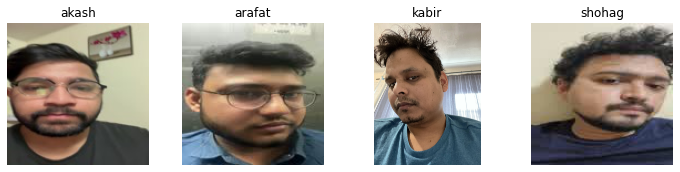

In [13]:
def plot_images(image_categories):
    
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[150]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)
        

In [14]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1917 images belonging to 4 classes.
Found 430 images belonging to 4 classes.
Found 430 images belonging to 4 classes.


In [7]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)


{0: 'akash', 1: 'arafat', 2: 'kabir', 3: 'shohag'}


In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(264, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(264, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)      

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 1725//32, 
                 validation_steps = 416//32)

Epoch 1/20
53/53 [==============================] - 92s 2s/step - loss: 0.8687 - accuracy: 0.6639 - val_loss: 0.8458 - val_accuracy: 0.7986
Epoch 2/20
53/53 [==============================] - 69s 1s/step - loss: 0.1751 - accuracy: 0.9528 - val_loss: 0.4751 - val_accuracy: 0.8715
Epoch 3/20
53/53 [==============================] - 76s 1s/step - loss: 0.0607 - accuracy: 0.9797 - val_loss: 0.6120 - val_accuracy: 0.8785
Epoch 4/20
53/53 [==============================] - 73s 1s/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.9982 - val_accuracy: 0.8403
Epoch 5/20
53/53 [==============================] - 73s 1s/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.5889 - val_accuracy: 0.9062
Epoch 6/20
53/53 [==============================] - 71s 1s/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.9443 - val_accuracy: 0.8611
Epoch 7/20
53/53 [==============================] - 71s 1s/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.5421 - val_accuracy: 0.8299
Epoch 8/20
53/53 [==

In [12]:
model.save("face_recognition_MMMM",save_format="h5")

In [13]:
model.evaluate(test_image_generator)

12/12 [==============================] - 23s 2s/step - loss: 0.4646 - accuracy: 0.9582


[0.4645962119102478, 0.9582245349884033]

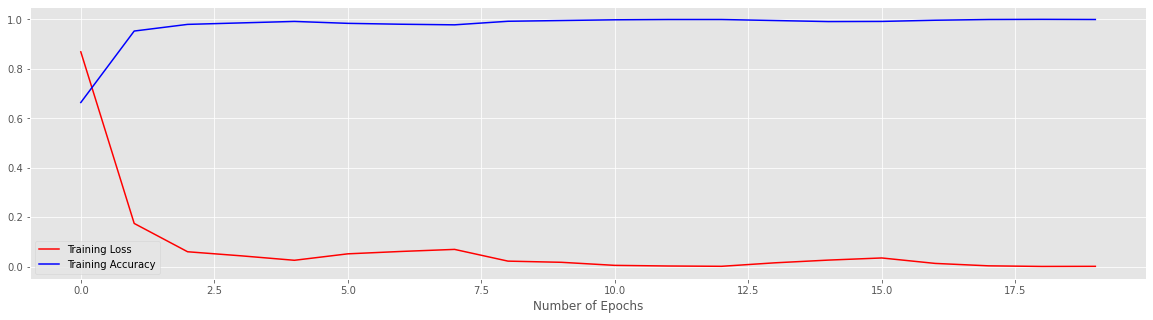

In [14]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

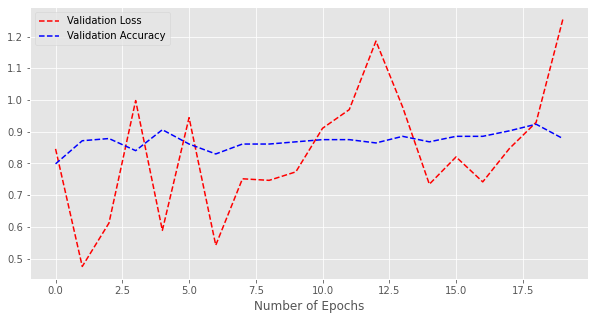

In [15]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
# plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
# plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=25, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 1725//32, 
                 validation_steps = 416//32)

Epoch 1/25
53/53 [==============================] - 74s 1s/step - loss: 1.0404 - accuracy: 0.5771 - val_loss: 1.3501 - val_accuracy: 0.5769
Epoch 2/25
53/53 [==============================] - 66s 1s/step - loss: 0.3476 - accuracy: 0.8972 - val_loss: 1.8948 - val_accuracy: 0.6490
Epoch 3/25
53/53 [==============================] - 66s 1s/step - loss: 0.1061 - accuracy: 0.9716 - val_loss: 1.2119 - val_accuracy: 0.7212
Epoch 4/25
53/53 [==============================] - 65s 1s/step - loss: 0.0936 - accuracy: 0.9681 - val_loss: 1.7017 - val_accuracy: 0.6466
Epoch 5/25
53/53 [==============================] - 64s 1s/step - loss: 0.0614 - accuracy: 0.9793 - val_loss: 0.7785 - val_accuracy: 0.8438
Epoch 6/25
53/53 [==============================] - 64s 1s/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 1.7055 - val_accuracy: 0.6995
Epoch 7/25
53/53 [==============================] - 64s 1s/step - loss: 0.0323 - accuracy: 0.9911 - val_loss: 1.6318 - val_accuracy: 0.7644
Epoch 8/25
53/53 [==

In [42]:
model.save("face_recognition_MMMM_V2",save_format="h5")

In [43]:
model.evaluate(test_image_generator)

13/13 [==============================] - 30s 2s/step - loss: 0.6819 - accuracy: 0.9450


[0.6819062232971191, 0.9449999928474426]

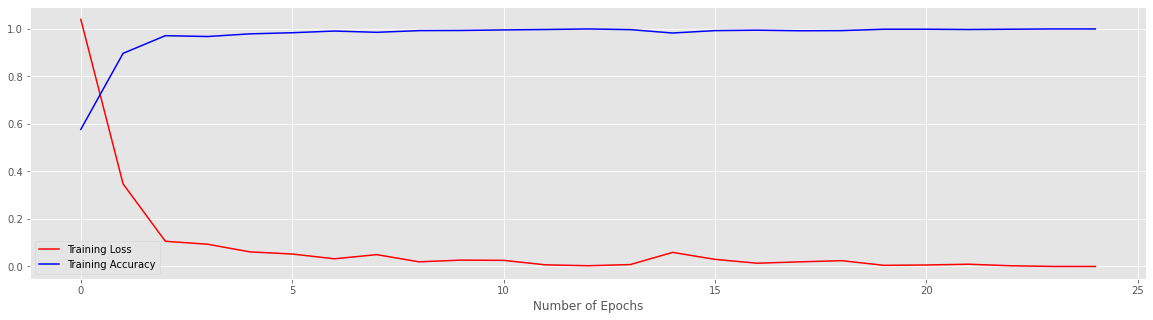

In [44]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

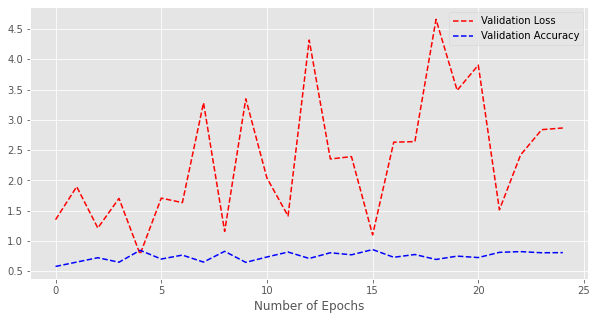

In [45]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
# plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
# plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=25, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 1917//32, 
                 validation_steps = 430//32)

Epoch 1/25
59/59 [==============================] - 74s 1s/step - loss: 0.8249 - accuracy: 0.6764 - val_loss: 0.9340 - val_accuracy: 0.5793
Epoch 2/25
59/59 [==============================] - 72s 1s/step - loss: 0.2305 - accuracy: 0.9273 - val_loss: 0.6728 - val_accuracy: 0.7957
Epoch 3/25
59/59 [==============================] - 73s 1s/step - loss: 0.0902 - accuracy: 0.9740 - val_loss: 0.4450 - val_accuracy: 0.8630
Epoch 4/25
59/59 [==============================] - 88s 1s/step - loss: 0.0523 - accuracy: 0.9814 - val_loss: 0.6110 - val_accuracy: 0.8462
Epoch 5/25
59/59 [==============================] - 85s 1s/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.5576 - val_accuracy: 0.8798
Epoch 6/25
59/59 [==============================] - 81s 1s/step - loss: 0.0931 - accuracy: 0.9756 - val_loss: 0.5858 - val_accuracy: 0.8846
Epoch 7/25
59/59 [==============================] - 76s 1s/step - loss: 0.0381 - accuracy: 0.9894 - val_loss: 0.6032 - val_accuracy: 0.8822
Epoch 8/25
59/59 [==

In [17]:
model.save("face_recognition_MMMM_V3",save_format="h5")

In [18]:
model.evaluate(test_image_generator)

14/14 [==============================] - 25s 2s/step - loss: 0.4641 - accuracy: 0.9488


[0.4641486704349518, 0.9488372206687927]

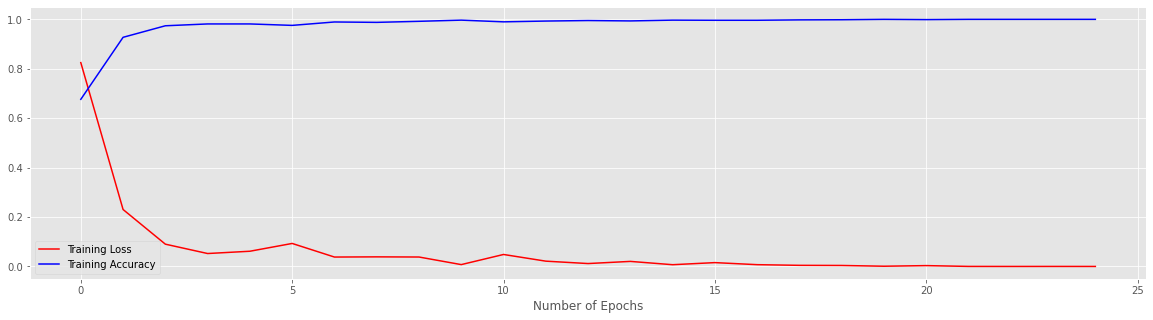

In [19]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

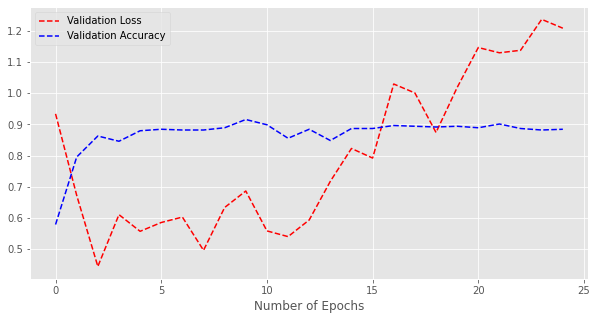

In [20]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
# plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
# plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [2]:
def generate_predictions_with_pre_trained_model(test_image_path, pre_model):
    class_map = {0: 'akash', 1: 'arafat', 2: 'kabir', 3: 'shohag'}
    test_img = image.load_img(test_image_path, target_size=(128, 128))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(pre_model.predict(test_img_input))
    print(predicted_label)
    predicted_person= class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}".format(predicted_person))
    plt.grid()
    plt.axis('off')
    plt.show()

In [3]:
from tensorflow.keras.models import load_model
pre_model = load_model("face_recognition_MMMM_V3")

0


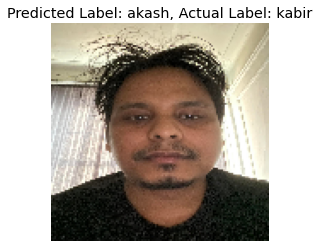

In [23]:
generate_predictions_with_pre_trained_model('./kabir.jpg', actual_label='kabir', pre_model = pre_model)

3


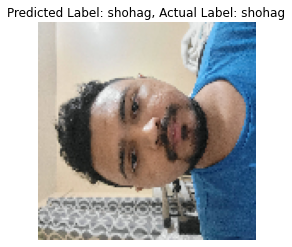

In [4]:
generate_predictions_with_pre_trained_model('./mehedi.jpg', actual_label='shohag', pre_model = pre_model)

1


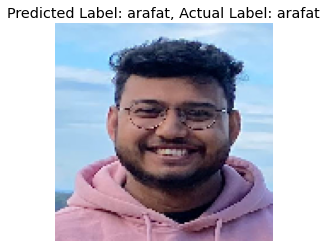

In [50]:
generate_predictions_with_pre_trained_model('./test_2.jpg', actual_label='arafat', pre_model = pre_model)

0


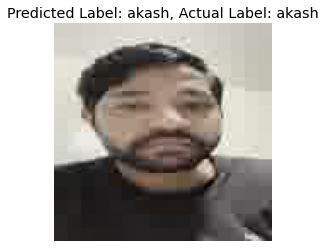

In [51]:
generate_predictions_with_pre_trained_model('./2.JPEG', actual_label='akash', pre_model = pre_model)

0


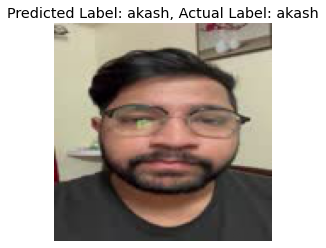

In [52]:
generate_predictions_with_pre_trained_model('./arafat_IMG_0387.MOV_20220411001754_0017.JPEG', actual_label='akash', pre_model = pre_model)

2


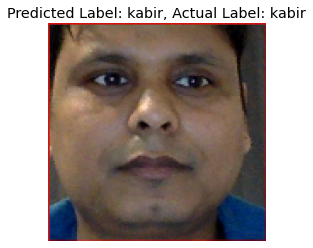

In [25]:
generate_predictions_with_pre_trained_model('./04_11_2022_22_08_33.jpg', actual_label='kabir', pre_model = pre_model)

2


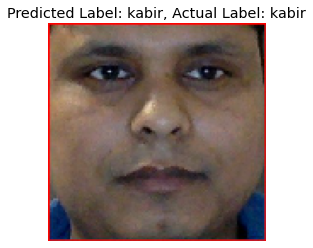

In [27]:
generate_predictions_with_pre_trained_model('./04_11_2022_22_08_35.jpg', actual_label='kabir', pre_model = pre_model)

In [ ]:
generate_predictions_with_pre_trained_model('./arafat_IMG_0387.MOV_20220411001754_0017.JPEG', actual_label='akash', pre_model = pre_model)

0


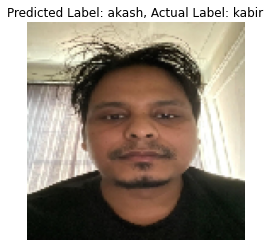

In [5]:
generate_predictions_with_pre_trained_model('./kabir.jpg', actual_label='kabir', pre_model = pre_model)

0


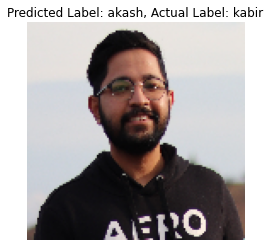

In [8]:
generate_predictions_with_pre_trained_model('./akash.JPG', actual_label='kabir', pre_model = pre_model)

1


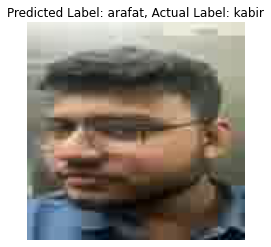

In [9]:
generate_predictions_with_pre_trained_model('./5.JPEG', actual_label='kabir', pre_model = pre_model)